# Purpose
---
The purpose of this note book is to explore regression modeling techniques such as SVM and KNN on a red wine quality dataset obtained from kaggle : https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

Furthermore, the project while be outlined using the 6 steps of data analysis adapted to machine learning 


# 6 Key steps 

We will follow and adapt the 6 key steps of Data analysis to this project.

6 Key steps: 

1) Ask 
- Define what the project would look like 
- Define what would qualify as successful result

2) Prepare 
- Build a timeline and determine how much time is needed
- Determine what data is needed to achieve a successful result

3) Process
- Collect, store, manage and protect the data.
- Processed the data by cleaning it to make sure it was complete, correct, relevant, and free of errors and outliers.

4) Analyze
- Experiment with different models and hyperparameters to meet criterias of success 
- Analyze data

5) Share / Visualize 
- Process and visualize data to share / make meaningful deductions from 

6) Act
- Determine how to implement changes and take actions based on the findings

# 1) Ask 
---
In the future these will be referenced as 1.1, 1.2, 1.3, etc. 
## Define what the project would look like 

## Define what would qualify as a successful result


# 2) Prepare 
---
## Build a timeline and determine how much time is needed

## Determine what data is needed to achieve a successful result


In [45]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Split into training and test sets 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 3) Process
---
##Collect, store, manage and protect the data.

##Processed the data by cleaning it to make sure it was complete, correct, relevant, and free of errors and outliers.

## Import data
 
 The dataset that we will be using is the red wine quality dataset from kaggle: 
 
 https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009 

In [2]:
# Import dataset
red_wine = pd.read_csv("https://raw.githubusercontent.com/Kirlewn/Machine-Learning-Projects/main/Data/red_wine_quality/winequality-red.csv")
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Data Exploration
Determine if there are any unusuable or strange data. 
This includes outliers, missing values, mismatched data types (an column with ints having a string input), etc. 

In [4]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From above we can see that there are a few features that have pretty significant standard deviations. 

Let's take a closer look at a few of these columns to see how they may relate to the quality. 

Namely: 

* fixed acidity	
* volatile acidity	
* citric acid	
* residual sugar	
* chlorides	
* free sulfur dioxide	 
* total sulfur dioxide	
* alcohol

`free sulfur dioxide` & `total sulfur dioxide` also have really high standard deviations. 

### Data Visualization 
Let's plot some of our columns to familiarize ourself with the data

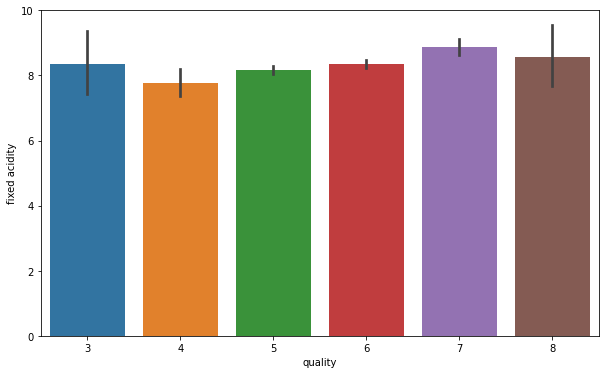

In [5]:
# Let's visualize fixed acidity vs quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = red_wine);

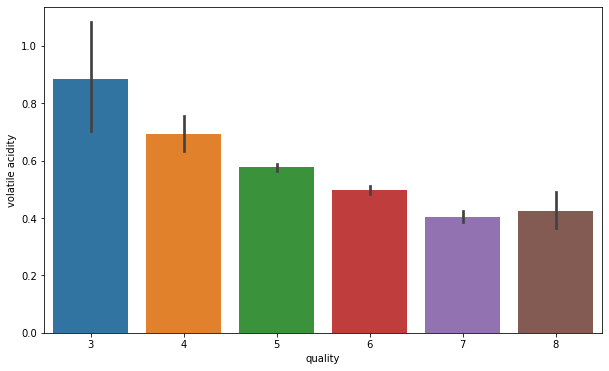

In [6]:
# Let's visualize volatile acidity vs quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = red_wine);

It appears the higher the volatile acidity, the lower the quality. 

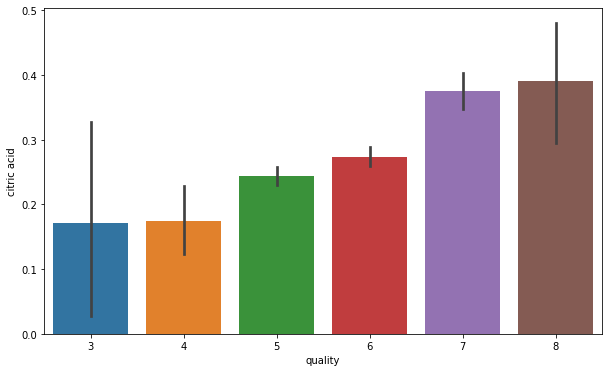

In [7]:
# Let's visualize citric acid vs quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = red_wine);

The higher the citric acid the better the quality of wine. Citric acid may be a good feature to use later.

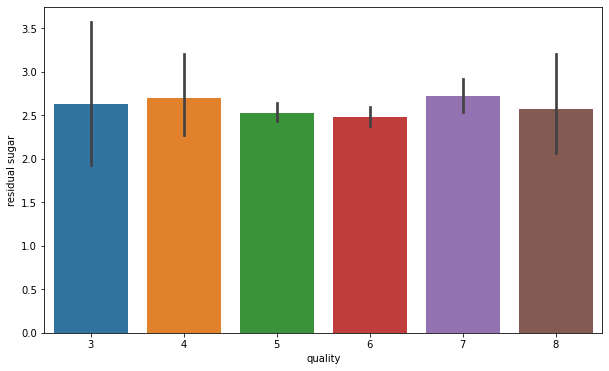

In [8]:
# Let's visualize residual sugar vs quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = red_wine);

Lower cholorides tends to correlate with lower quality of wine.

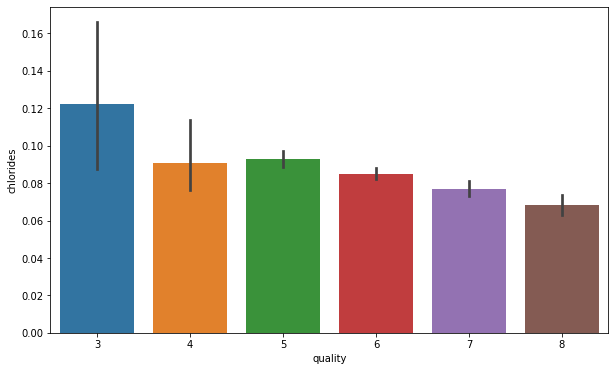

In [9]:
# Let's visualize chlorides vs quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = red_wine);

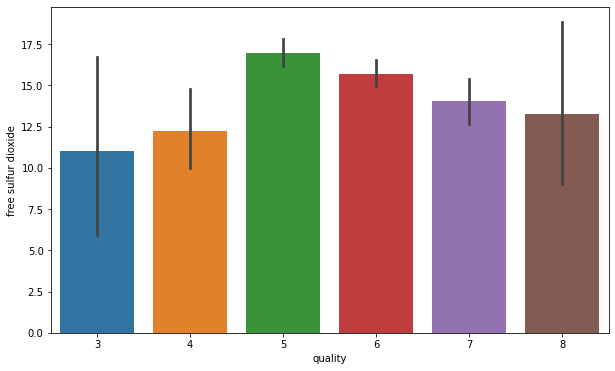

In [10]:
# Let's visualize free sulfur dioxide vs quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = red_wine);

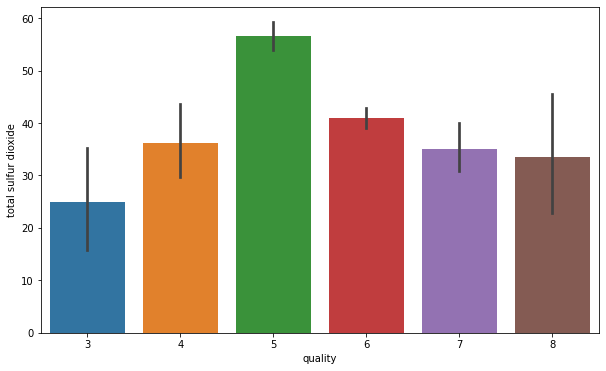

In [53]:
# Let's visualize total sulfur dioxide vs quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = red_wine);

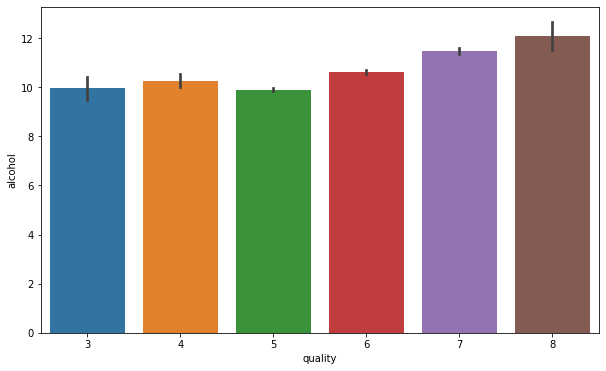

In [12]:
# Let's visualize alcohol vs quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = red_wine);

Alcohol level rises as does quality, indicating it may be a good feature to use.

Let's also visualize the distribution of samples for `quality`

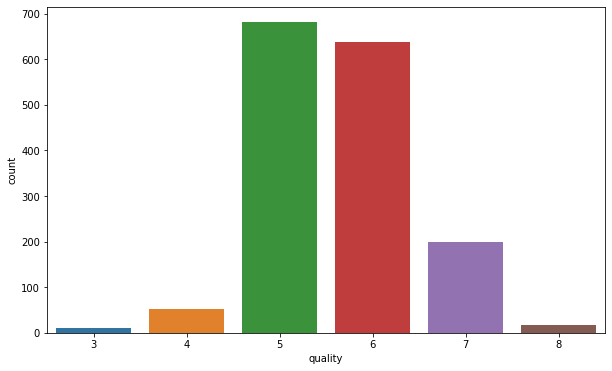

In [13]:
fig = plt.figure(figsize = (10,6))
sns.countplot(x = 'quality', data = red_wine);

In [16]:
red_wine.quality.count()

1599

This distribution is concerning. Out of 1599 samples, the majority are of quality 5 or 6, with barely any samples of 3 or 8. This may lead to the model having a hard time correctly prediction certain qualities due to lack of adequate samples to learn.



## Preprocessing 

### Tranform label column into binary classification

If we wanted to turn this into a classification problem we could split the dataset in half with [3,4,5] being considered as poor quality and [6,7,8] being considered good quality. This may allow for a binary classification model with similarly sized sample data. 

let's see what that would look like.
It is generally a good idea to not make too many changes to your base dataset so you do not have to reinitialize it, so let's create a copy of the dataset to make changes to

In [23]:
# create copy of dataset
data = red_wine.copy()
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [42]:
# create `bins` that we can use to split the dataset
bins = (2, 5, 8)
group_names = ['bad', 'good']

In [43]:
# create a new column that will act as our label 
data['rating'] =  pd.cut(data['quality'], bins = bins, labels = group_names)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad


In [46]:
# Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [47]:
data['rating'] = label_quality.fit_transform(data['rating'])
data.rating

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: rating, Length: 1599, dtype: int64

In [48]:
# check the distribution of samples
data.rating.value_counts()

1    855
0    744
Name: rating, dtype: int64

By splitting after the dataset in half with [3,4,5] being considered as poor quality and [6,7,8] being considered good quality, we get a more even dataset that with multiple classes.

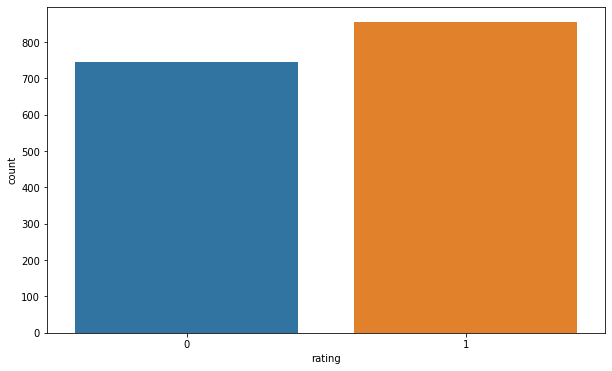

In [37]:
# visualize
fig = plt.figure(figsize = (10,6))
sns.countplot(data['rating']);

### Address the outliers 

As we noticed earlier, there are quite a few columns that have substantial standard deviations and noticable outliers. 

There are a few ways that we can address these outliers.

1. Drop columns : depending on the number of features in our dataset and whether those features have a strong correlation to the label, we could potentially no use certain feature columns. 

2. Scale / normalize : if the columns are important or we do not have many feature columns we could try to scale the values of the columns to reduce the outliers. 

3. Drop outliers: if we have a very large dataset we could remove outliers 

Some of these methods are not as advisable as others.

Let's take a close look at the outlier columns and see what we can do to address them


In [49]:
# let's call describe again to get a refresher of our data
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


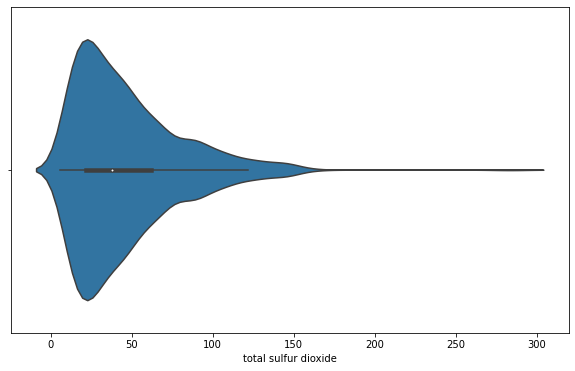

In [51]:
# To better visualize the outliers we can use either a box plot or a violin plot 
fig = plt.figure(figsize = (10,6))
sns.violinplot(x = data['total sulfur dioxide']);

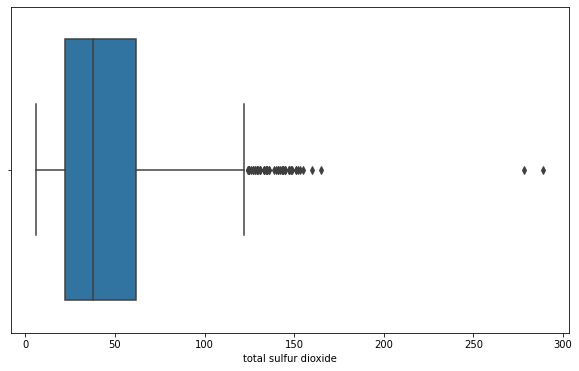

In [52]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = data['total sulfur dioxide']);

As we can see most of the data points fall around the 50 with some going as far 300. 

Let's explore each of the methods described above and their effect on training a simple model

1. Drop columns : depending on the number of features in our dataset and whether those features have a strong correlation to the label, we could potentially no use certain feature columns.

# 4) Analyze
---

Experiment with different models and hyperparameters to meet criterias of success. 

Outlier Experiments
* Some models we will experiment with include 
  1. Dropped column model 
    - this model is a proposed solution to addressing outliers. We will train a simple model without the 2 highest standard deviation columns `free sulfur dioxide` and `total sulfur dioxide`. 
  2. Scaled model 
    - this model is another proposed solution to addressing outliers. We will train a simple model after having scaled all of the columns using sklearn StandardScaler
  3. Dropped outlier model
    - this model is the final proposed solution to addressing outliers. In this model we will remove all data entries which are considered to be outliers 

Model Experiments
* Some models we will experiment with include
  1. Principal Component Analysis (PCA) 
    - PCA is an analysis which focuses on dimensionality reduction and identifying feature covariance through the means of clustering.  
  2. Random Forest Classifier
    - RFC focuses on utilizing a tree search algorithm but selecting a random feature as the root node, then selecting other features as its child nodes and continuing this process to determine the label. It then aggregrates the prediction at then end of each branch to determine the final prediction. It repeats the process numerous times to create a model.
  3. Support Vector Classifier 
    - SVC is a type of Support Vector Machine (SVM) which aims to solve classification problems by drawing a line or plane in a 2-D or multidimensional problem space that seperates the clusters of datapoints based on their label while optimizing to ensure that it maximizes the "margin" or distance between the closest points of different clusters. 
  4. K Nearest Neighbors
    - KNN is similar to the approaches mentioned above. KNN is a clustering approach that can use an approach like PCA to build a problem space and then classifies new data based on its proximity to the nearest "K" number of neighbors. 


Analyze data

### Dataset Experiments 
Let's start by creating the datasets that will be used for the outlier experiments

#### Dropped column dataset
Let's create a modified dataset that drops `free sulfur dioxide` and `total sulfur dioxide`. 

#### Scaled model dataset

#### Dropped Outlier dataset

### Model Experiments
  1. Simple baseline model
  2. Principal Component Analysis (PCA) 
  3. Random Forest Classifier
  4. Support Vector Classifier 
  5. K Nearest Neighbors



#### Simple baseline model

Let's start with a simple model to use as a baseline